# Support Vector Machine Full Stack
In this code page, shows how the model were trained and tested using support vector machine algorithm.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import naive_bayes, svm
from sklearn.preprocessing import LabelEncoder

Loading the cleaned dataset and split using stratfied shuffle split


In [2]:
df = pd.read_csv('d:/Mini Project/Github/Text Classification/Crime Text Classification/Data/FullTotalCleanedDatasetIndexFinal.csv')
sentences = df['text'].values
y = df['jenayah'].values

sss=StratifiedShuffleSplit(n_splits = 5, test_size=0.2, random_state=1)
sss.get_n_splits(df['text'],df['jenayah'])

for train_index, test_index in sss.split(df['text'],df['jenayah']):
      #print("TRAIN:", train_index, "TEST:", test_index)
    Train_X, Test_X = df['text'][train_index], df['text'][test_index]
    Train_Y, Test_Y = df['jenayah'][train_index],df['jenayah'][test_index]


Vectorized the splited dataset using count vectorizer

In [4]:
le = LabelEncoder()
y_train = le.fit_transform(Train_Y)
y_test = le.fit_transform(Test_Y)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)
vectorizer.vocabulary_
vectorizer.transform(sentences).toarray()

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(Train_X)

X_train = vectorizer.transform(Train_X)
X_test  = vectorizer.transform(Test_X)
# print(vectorizer.get_feature_names())
print('done')

done


Trained the dataset, and predicted using the Support Vector Machine Default Parameter (Baseline) .

In [ ]:
from sklearn.svm import SVC

svm =SVC(C=10.0,gamma='scale',kernel='rbf',probability=True)
svm.fit(X_train, y_train)
score = svm.score(X_test, y_test)
predicted = svm.predict(X_test)
predicted_prob = svm.predict_proba(X_test)


Evaluation of the algorithm using various metrics and figures

start
Accuracy: 0.8926
Accuracy 2: 0.8926
Recall/Sensitivity: 0.8926
Auc: 0.9883
rate MSE: 0.9883
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1221
           1       0.98      0.94      0.96       107
           2       0.89      0.91      0.90       137
           3       0.97      0.92      0.95        85
           4       0.89      0.90      0.89       324
           5       0.94      0.64      0.76        25
           6       0.96      0.96      0.96       362
           7       0.94      0.94      0.94       707
           8       0.93      0.74      0.83        35
           9       0.96      0.91      0.94        80
          10       0.95      0.88      0.91        24
          11       0.88      0.85      0.87       130
          12       0.67      0.36      0.47        22
          13       0.65      0.60      0.63       220
          14       0.73      0.77      0.75        60
          15       0.78      0.79    

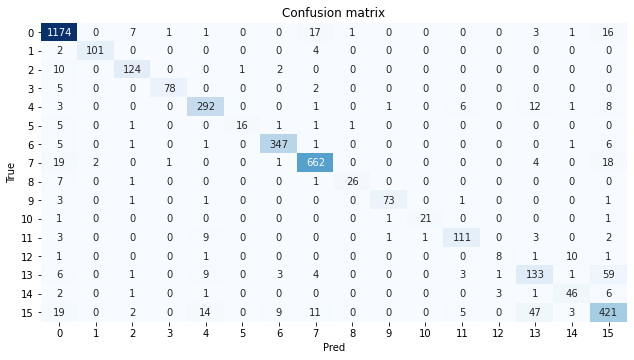

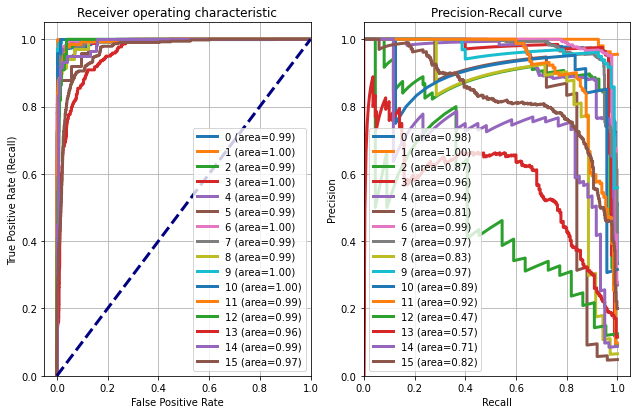

In [2]:
print('start')
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
accuracy2 = metrics.balanced_accuracy_score(y_test, predicted)
recall = metrics.recall_score(y_test, predicted,average='micro')
auc = metrics.roc_auc_score(y_test, predicted_prob, average='weighted',
                            multi_class="ovr")
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, predicted, squared=False)
print("Accuracy:",  round(accuracy,4))
print("Accuracy 2:",  round(accuracy,4))
print("Recall/Sensitivity:",round(recall,4 ))
print("Auc:", round(auc,4))
print("rate MSE:", round(auc,4))
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 5.5, forward=True)
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10.5, 6.5, forward=True)

#fig.savefig('e:/Notebook/MODEL/Baseline_Model/CM svm.png')
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
fig.savefig('e:/Notebook/MODEL/Baseline_Model/ROC svm.png')
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()
#fig.savefig('e:/Notebook/MODEL/Baseline_Model/ROC Precision-Recall curve baseline SVM.png')

exporting and save model for tested on public test set.

In [3]:
import pickle
filename = 'e:/Notebook/MODEL/Baseline_Model/Baselinedsvm.sav'
pickle.dump(svm, open(filename, 'wb'))

# Hypertuning SVM algorithm
The SVM were tuned using regularization Strength , Kernel Parameters and Gamma value.

In [3]:
#Fine tuning SVM
print('start')
from sklearn.svm import SVC


from sklearn.model_selection import GridSearchCV
  
# defining parameter range

param_grid = {'C': [1,0.1,0.01,0.001,10,100],  
              'gamma': ['scale','auto'], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  }
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3 ,cv=5) 
print('fit grid')  
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


grid_predictions = grid.predict(X_test)

# print best parameter after tuning 

best_result = grid.best_score_

data=pd.DataFrame(grid.cv_results_)

data.to_csv('e:/Notebook/MODEL/Hypertune_Model/SVMhypertuned.csv', mode='a', header=False)

start
fit grid
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=  17.3s
[CV 2/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=  18.5s
[CV 3/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=  18.1s
[CV 4/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=  18.2s
[CV 5/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=  19.8s
[CV 1/5] END ................C=0.1, gamma=scale, kernel=poly; total time= 1.5min
[CV 2/5] END ................C=0.1, gamma=scale, kernel=poly; total time= 1.6min
[CV 3/5] END ................C=0.1, gamma=scale, kernel=poly; total time= 1.5min
[CV 4/5] END ................C=0.1, gamma=scale, kernel=poly; total time= 1.5min
[CV 5/5] END ................C=0.1, gamma=scale, kernel=poly; total time= 1.5min
[CV 1/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=  56.2s
[CV 2/5] END .................C=0.

Save the best accuracy model among the tested 

In [5]:
print('start')

import pickle
best_result = grid.best_score_

data=pd.DataFrame(grid.cv_results_)

filename = 'e:/Notebook/MODEL/Hypertune_Model/hypsvm.sav'
pickle.dump(grid.best_estimator_, open(filename, 'wb'))

model = pickle.load(open('e:/Notebook/MODEL/Hypertune_Model/hypsvm.sav', 'rb'))


start


Evaluated the hypertuned model with metrics and figures

start
Accuracy: 0.9108
Accuracy 2: 0.9108
Recall/Sensitivity: 0.9108
Auc: 0.9942
rate MSE: 0.9942
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1221
           1       0.97      0.96      0.97       107
           2       0.88      0.93      0.90       137
           3       0.96      0.95      0.96        85
           4       0.89      0.96      0.93       324
           5       0.92      0.92      0.92        25
           6       0.96      0.99      0.97       362
           7       0.96      0.95      0.95       707
           8       0.97      0.86      0.91        35
           9       0.97      0.93      0.95        80
          10       0.96      0.92      0.94        24
          11       0.90      0.88      0.89       130
          12       0.67      0.27      0.39        22
          13       0.75      0.50      0.60       220
          14       0.72      0.83      0.78        60
          15       0.77      0.84    

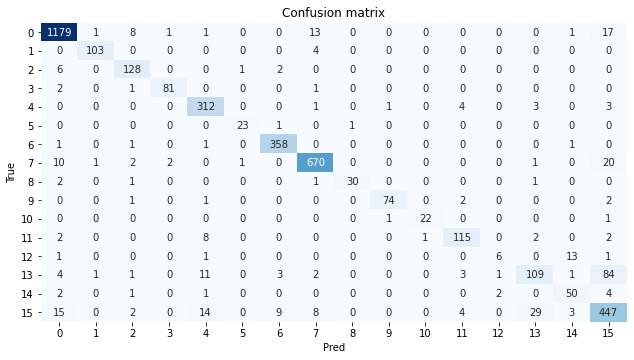

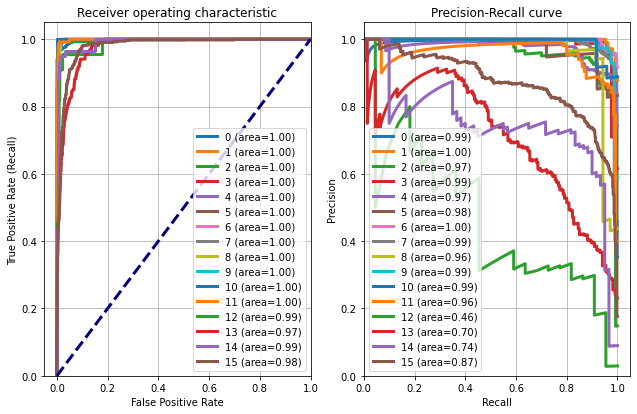

In [3]:
print('start')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

model =SVC(C= 0.1, gamma='scale', kernel='linear', probability=True)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)


import sklearn.metrics as metrics
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
accuracy2 = metrics.balanced_accuracy_score(y_test, predicted)
recall = metrics.recall_score(y_test, predicted,average='micro')
auc = metrics.roc_auc_score(y_test, predicted_prob, average='weighted',
                            multi_class="ovr")
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, predicted, squared=False)
print("Accuracy:",  round(accuracy,4))
print("Accuracy 2:",  round(accuracy,4))
print("Recall/Sensitivity:",round(recall,4 ))
print("Auc:", round(auc,4))
print("rate MSE:", round(auc,4))
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 5.5, forward=True)
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10.5, 6.5, forward=True)

fig.savefig('e:/Notebook/MODEL/Hypertune_Model/CM hyp svm.png')
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
fig.savefig('e:/Notebook/MODEL/Hypertune_Model/ROC hyp svm.png')
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()
fig.savefig('e:/Notebook/MODEL/Hypertune_Model/ROC Precision-Recall curve hypertuned SVM.png')

In [4]:
import pickle
filename = 'e:/Notebook/MODEL/Hypertune_Model/hypsvm3.sav'
pickle.dump(model, open(filename, 'wb'))

Tested on single text to check its ability to predict the crime index class from a single text


In [11]:
text='Remaja lapan belas tahun bukan sahaja menjadi mangsa rogol dan liwat oleh bapa malah tiga abang kandungnya turut laku perbuatan keji itu sejak tahun lalu penderita berakhir selepas semua suspek di cekup semalam'
string=vectorizer.transform([text])

predicted = model.predict(string)
predicted_prob = model.predict_proba(string)

print(predicted)
print(predicted_prob)

[7]
[[6.14806180e-04 7.88066748e-05 5.06257559e-05 7.43616382e-06
  2.30833366e-05 1.02702948e-04 3.10418868e-05 9.95253246e-01
  7.63782321e-05 7.81712621e-06 8.50179993e-06 9.87689540e-05
  4.56806340e-06 2.87814121e-04 7.72325500e-06 3.34667961e-03]]


This were evaluated again due to incompatible sklearn model with google colab to ensure it produce consistent result, therefore skip this .

In [3]:
import pickle
print('start')
model = pickle.load(open('e:/Notebook/MODEL/Hypertune_Model/hypsvmfinal.sav', 'rb'))

start


start
Accuracy: 0.9108
Recall/Sensitivity: 0.9108
Auc: 0.995
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1221
           1       0.97      0.96      0.97       107
           2       0.88      0.93      0.90       137
           3       0.96      0.95      0.96        85
           4       0.89      0.96      0.93       324
           5       0.92      0.92      0.92        25
           6       0.96      0.99      0.97       362
           7       0.96      0.95      0.95       707
           8       0.97      0.86      0.91        35
           9       0.97      0.93      0.95        80
          10       0.96      0.92      0.94        24
          11       0.90      0.88      0.89       130
          12       0.67      0.27      0.39        22
          13       0.75      0.50      0.60       220
          14       0.72      0.83      0.78        60
          15       0.77      0.84      0.80       531

    accuracy       

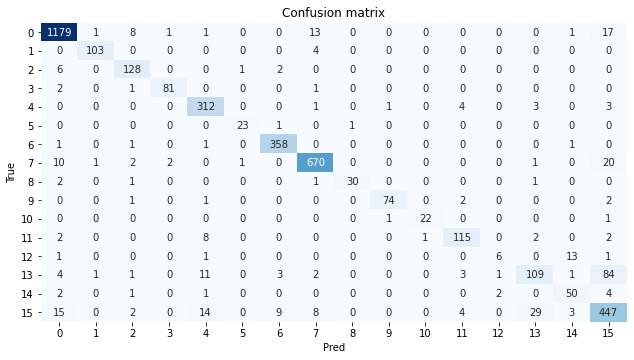

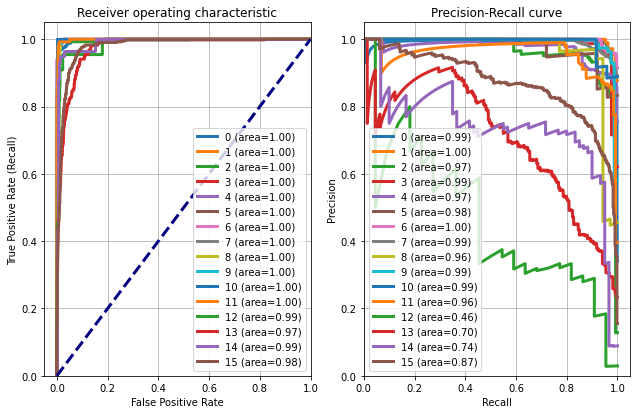

In [4]:
print('start')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)


import sklearn.metrics as metrics
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted)
recall = metrics.recall_score(y_test, predicted,average='micro')
auc = metrics.roc_auc_score(y_test, predicted_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,4))
print("Recall/Sensitivity:",round(recall,4 ))
print("Auc:", round(auc,4))
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 5.5, forward=True)
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10.5, 6.5, forward=True)

# fig.savefig('e:/Notebook/MODEL/Hypertune_Model/CM hyp svm.png')
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
# fig.savefig('e:/Notebook/MODEL/Hypertune_Model/ROC hyp svm.png')
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()
# fig.savefig('e:/Notebook/MODEL/Hypertune_Model/ROC Precision-Recall curve hypertuned SVM.png')

Manually check the metric calculation using confusion matrix value

In [3]:
confusion_matrix=cm

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)

FP=np.array(FP).tolist()
FP=sum(FP)
FN=np.array(FN).tolist()
FN=sum(FN)
TP=np.array(TP).tolist()
TP=sum(TP)



TN = confusion_matrix.sum() - (FP + FN + TP)
TN = -(confusion_matrix.sum() - (FP + FN + TP))
print(TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

#f1 score

F1score=TP/(TP+(1/2*(FP+FN)))
print('Accuracy:',ACC)
print('Sensitivity Rate:',TPR)
print('Precision:',TPR)
print('F1 Score:',TPR)

# print(type(FP))
# fp=np.array(FP).tolist()
# print(fp.sum)

# print(confusion_matrix.sum())
# # print(TPR)
recall = metrics.recall_score(y_test, predicted,average='micro')
f1score = metrics.f1_score(y_test, predicted,average='micro')
# print('f1:',recall)
# print('fn:',FN)
# print('fp:',FP)
# print('tp:',TP)
# print('TN:',TN)

print('f1score:',f1score)


# fm=   TP/(TP+(1/2*(FP+FN)))

# print('f1:',fm)
# print('f1:',fm)

363
Accuracy: 0.8486238532110092
Sensitivity Rate: 0.9108108108108108
Precision: 0.9108108108108108
F1 Score: 0.9108108108108108
f1score: 0.9108108108108108
